In [1]:
# 바다 코끼리 연산자

In [2]:
[a := 1, 2, 3]

[1, 2, 3]

In [3]:
a

1

In [4]:
if (b:=0) > 1:
    print('A')

In [5]:
b

0

In [6]:
import seaborn as sns

In [7]:
tips = sns.load_dataset('tips')

In [8]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# 특정 컬럼 안의 값들이 전부 잘못된 경우
- 전체적인 수정이 필요한 경우...
# apply, applymap, map

# element-wise
# map
- ( Series / callable / dict )인 경우에만 사용가능다. (시리즈는 한 줄을 말한다.)

# applymap
- ( df / callable , dict(x), df / )

# applymap
...

# object data에 str붙이면 문자열과 정규식 관련 라이브러리 사용가능

# mutable
- return이 있당

In [23]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [115]:
tips.select_dtypes('float64').applymap(lambda x: x+1)

,total_bill,tip
0,17.99,2.01
1,11.34,2.66
2,22.01,4.50
3,24.68,4.31
4,25.59,4.61
...,...,...
239,30.03,6.92
240,28.18,3.00
241,23.67,3.00
242,18.82,2.75


In [15]:
# data가 object 또는 category 일 때 사용한다.
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [14]:
# 성별 컬럼이 전체적으로 잘못되었을 때, 수정하고 싶을 때
tips.sex.map(lambda x: 'F' if x=='Female' else 'M')

0      F
1      M
2      M
3      M
4      F
      ..
239    M
240    F
241    M
242    M
243    F
Name: sex, Length: 244, dtype: category
Categories (2, object): ['M', 'F']

In [21]:
tips.sex.map(lambda x: x)

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: category
Categories (2, object): ['Male', 'Female']

In [16]:
import numpy as np

In [17]:
a = [1,2,1,2,1,3,1,2,3,5,5,1]

In [18]:
set(a)

{1, 2, 3, 5}

In [19]:
np.unique(a, return_counts=True)

(array([1, 2, 3, 5]), array([5, 3, 2, 2], dtype=int64))

In [22]:
tips.sex.map({'Female':'F', 'Male':'M'})

0      F
1      M
2      M
3      M
4      F
      ..
239    M
240    F
241    M
242    M
243    F
Name: sex, Length: 244, dtype: category
Categories (2, object): ['M', 'F']

# MPG

In [25]:
mpg = sns.load_dataset('mpg')

In [26]:
 mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [29]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [30]:
mpg.name.str.split(' ', expand=True)

,0,1,2,3,4,5
0,chevrolet,chevelle,malibu,None,None,None
1,buick,skylark,320,None,None,None
2,plymouth,satellite,None,None,None,None
3,amc,rebel,sst,None,None,None
4,ford,torino,None,None,None,None
...,...,...,...,...,...,...
393,ford,mustang,gl,None,None,None
394,vw,pickup,None,None,None,None
395,dodge,rampage,None,None,None,None
396,ford,ranger,None,None,None,None


In [33]:
mpg['name'].apply(lambda x: x)

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [41]:
a = '한소희  너무 예쁘다'

In [42]:
a.split()

['한소희', '너무', '예쁘다']

In [43]:
','.join(a)

'한,소,희, , ,너,무, ,예,쁘,다'

In [38]:
' '.join('abcd')

'a b c d'

In [39]:
[x for x in dir(a) if 'split' in x]

['rsplit', 'split', 'splitlines']

In [44]:
import pandas as pd

In [90]:
pd.read_csv('https://raw.githubusercontent.com/hadley/tidy-data/master/data/tb.csv')

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,14581.0,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,13155.0,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,12718.0,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,10583.0,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [91]:
pd.read_csv('https://raw.githubusercontent.com/hadley/tidy-data/master/data/billboard.csv', encoding='latin1')

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
tb = pd.read_csv(r'C:\Users\dlel2\Documents\GitHub\INISW_2023\빅데이터 파이프라인\data\tb.csv')
tb

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,14581.0,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,13155.0,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,12718.0,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,10583.0,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [83]:
pd.read_csv('./data/tb.csv')

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,14581.0,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,13155.0,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,12718.0,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,10583.0,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [74]:
# 
# pd.read_csv('./data/pew.txt')
pew = pd.read_csv('./data/pew.txt', sep='\t')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [76]:
pew = pd.read_csv('./data/pew.txt', delimiter='\t')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [93]:
pew.melt('religion', var_name='ocp', value_name= 'freq')

,religion,ocp,freq
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [94]:
billboard = pd.read_csv('./data/billboard.csv', encoding='latin1')
billboard

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
billboard_melt = 

In [ ]:
billboard_melt['value'] = billboard_melt.value.astype('int64')

In [ ]:
billboard_melt

In [96]:
tb.filter(regex='^new_sp')

,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,14581.0,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,198.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,13155.0,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,656.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,12718.0,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,199.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,10583.0,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,153.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [103]:
tb_melt = tb.melt(['iso2', 'year']).dropna()
tb_melt

,iso2,year,variable,value
4,AD,1993,new_sp,15.0
5,AD,1994,new_sp,24.0
6,AD,1996,new_sp,8.0
7,AD,1997,new_sp,17.0
8,AD,1998,new_sp,1.0
...,...,...,...,...
120964,VU,2008,new_sp_fu,0.0
121038,YE,2008,new_sp_fu,0.0
121092,ZA,2008,new_sp_fu,0.0
121119,ZM,2008,new_sp_fu,0.0


In [104]:
tb_melt['variable'] = tb_melt.variable.str.replace('new_sp', '')
tb_melt

,iso2,year,variable,value
4,AD,1993,,15.0
5,AD,1994,,24.0
6,AD,1996,,8.0
7,AD,1997,,17.0
8,AD,1998,,1.0
...,...,...,...,...
120964,VU,2008,_fu,0.0
121038,YE,2008,_fu,0.0
121092,ZA,2008,_fu,0.0
121119,ZM,2008,_fu,0.0


In [105]:
tb_melt.variable.value_counts()

          3067
_m4554    2407
_m3544    2401
_m5564    2400
_m2534    2394
_m65      2394
_m1524    2393
_f4554    2387
_f2534    2386
_f3544    2384
_f65      2382
_f1524    2380
_f5564    2380
_m014     2367
_f014     2364
_f514      404
_m514      401
_f04       393
_m04       392
_mu        272
_fu        271
Name: variable, dtype: int64

In [107]:
tb_melt2 = tb_melt[tb_melt.variable!=''].copy()
tb_melt2

,iso2,year,variable,value
5784,AD,2005,_m04,0.0
5785,AD,2006,_m04,0.0
5787,AD,2008,_m04,0.0
5811,AE,2006,_m04,0.0
5812,AE,2007,_m04,0.0
...,...,...,...,...
120964,VU,2008,_fu,0.0
121038,YE,2008,_fu,0.0
121092,ZA,2008,_fu,0.0
121119,ZM,2008,_fu,0.0


In [111]:
tb_melt2['sex'] = tb_melt2.variable.map(lambda x: 'M' if x.startswith('_m') else 'F')
tb_melt2

,iso2,year,variable,value,sex
5784,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [112]:
tb_melt2.variable.value_counts()

_m4554    2407
_m3544    2401
_m5564    2400
_m65      2394
_m2534    2394
_m1524    2393
_f4554    2387
_f2534    2386
_f3544    2384
_f65      2382
_f5564    2380
_f1524    2380
_m014     2367
_f014     2364
_f514      404
_m514      401
_f04       393
_m04       392
_mu        272
_fu        271
Name: variable, dtype: int64

In [114]:
tb_melt2.rename({'iso2':'iso'}, axis=1)

,iso,year,variable,value,sex
5784,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [116]:
tb_melt2.rename(columns={'iso':'iso2'})

,iso2,year,variable,value,sex
5784,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [118]:
tb_melt2.rename(index={5784:'sun'})

,iso2,year,variable,value,sex
sun,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [119]:
tb_melt2

,iso2,year,variable,value,sex
5784,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [120]:
tb_melt2

,iso2,year,variable,value,sex
5784,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [121]:
# label
# columns
tb_melt2.drop(columns=['iso2', 'year'])

,variable,value,sex
5784,_m04,0.0,M
5785,_m04,0.0,M
5787,_m04,0.0,M
5811,_m04,0.0,M
5812,_m04,0.0,M
...,...,...,...
120964,_fu,0.0,F
121038,_fu,0.0,F
121092,_fu,0.0,F
121119,_fu,0.0,F


In [124]:
tb_melt2[['year', 'sex']]

,year,sex
5784,2005,M
5785,2006,M
5787,2008,M
5811,2006,M
5812,2007,M
...,...,...
120964,2008,F
121038,2008,F
121092,2008,F
121119,2008,F


# aggregation

# SAC
## split, apply, combine

In [127]:
from itertools import groupby

In [126]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [135]:
tips.groupby('sex').agg('mean')

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [139]:
tips.groupby(['sex', 'day'])[['tip', 'total_bill']].agg('mean')

tip  total_bill
sex    day                       
Male   Thur  2.980333   18.714667
       Fri   2.693000   19.857000
       Sat   3.083898   20.802542
       Sun   3.220345   21.887241
Female Thur  2.575625   16.715312
       Fri   2.781111   14.145556
       Sat   2.801786   19.680357
       Sun   3.367222   19.872222

In [140]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [148]:
# 담배피는 여부와 시간에 따라 tip의 최댓값
tips.groupby(['smoker', 'time'])[['tip']].agg('max')

tip
smoker time        
Yes    Lunch    5.0
       Dinner  10.0
No     Lunch    6.7
       Dinner   9.0

In [147]:
# 담배피는 여부와 시간에 따라 tip의 최댓값
tips.groupby(['smoker', 'time'])[['tip']].agg(['max', 'min'])

tip      
                max   min
smoker time              
Yes    Lunch    5.0  1.58
       Dinner  10.0  1.00
No     Lunch    6.7  1.25
       Dinner   9.0  1.00

In [151]:
# 담배피는 여부와 시간에 따라 tip의 최댓값
tips.groupby(['smoker', 'time'], as_index=False)[['tip']].agg('max')

,smoker,time,tip
0,Yes,Lunch,5.0
1,Yes,Dinner,10.0
2,No,Lunch,6.7
3,No,Dinner,9.0


<AxesSubplot:xlabel='smoker,time'>

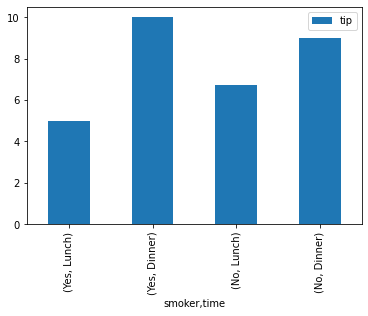

In [152]:
tips.groupby(['smoker', 'time'])[['tip']].agg('max').plot.bar()

In [153]:
tips.groupby(['smoker', 'time'])[['tip']].agg('max').plot.;bar()

SyntaxError: invalid syntax (Temp/ipykernel_27756/1530644503.py, line 1)

In [154]:
import sidetable

In [ ]:
x = tips.groupby(['smoker': tims])[['tio']]